In [45]:
import pandas as pd

In [67]:
#import data
df = pd.read_csv('../telegram_data.csv')

In [47]:
df.columns

Index(['Channel Title', 'Channel Username', 'ID', 'Message', 'Date',
       'Media Path'],
      dtype='object')

In [48]:
df.head()

,Channel Title,Channel Username,ID,Message,Date,Media Path
0,Sheger online-store,@Shageronlinestore,7383,💥Miralux Hot plate\n ባለሁለት ምድጃ ስቶቭ\n\n 💯o...,2025-06-19 06:31:31+00:00,data/photos/@Shageronlinestore_7383.jpg
1,Sheger online-store,@Shageronlinestore,7382,💥7pcs glass water set\n\n✔️ አንድ ማራኪ ጆግና 6 መጠጫ ...,2025-06-18 11:19:11+00:00,data/photos/@Shageronlinestore_7382.jpg
2,Sheger online-store,@Shageronlinestore,7381,NaN,2025-06-18 11:19:11+00:00,data/photos/@Shageronlinestore_7381.jpg
3,Sheger online-store,@Shageronlinestore,7380,NaN,2025-06-18 11:19:11+00:00,data/photos/@Shageronlinestore_7380.jpg
4,Sheger online-store,@Shageronlinestore,7379,NaN,2025-06-18 11:19:11+00:00,data/photos/@Shageronlinestore_7379.jpg


In [49]:
df["Channel Title"].unique()

array(['Sheger online-store', 'ልዩ እቃ', 'SINA KIDS/ሲና ኪድስⓇ', 'ማራኪ ცЯﾑŋの™',
       'qnash.com - ቅናሽ ®️', 'ምርጥ ዕቃ'], dtype=object)

In [71]:
df["Message"].notnull().sum()



np.int64(19190)

In [51]:
df.shape

(35168, 6)

In [52]:
#drop rows with empty messages
df = df[df["Message"].notnull()]

In [53]:
first = df["Message"].head(1)
print(first)

0    💥Miralux Hot plate\n ባለሁለት ምድጃ ስቶቭ\n\n      💯o...
Name: Message, dtype: object


In [54]:
# remove new line from Message
df["Message"] = df["Message"].str.replace("\n", " ", regex=False)

In [55]:
# remove emojis and  special characters
df["Message"] = df["Message"].str.replace(r"[^\w\s]", "", regex=True)

In [56]:
# remove non Amharic characters and numbers
df["Message"] = df["Message"].str.replace(r"[^\u1200-\u137F\s0-9]", "", regex=True)

In [57]:
#Tokenize the messages
df["Message"] = df["Message"].str.split()


In [62]:
# drop rows if if there is no amharic text
df = df[df["Message"].apply(lambda x: any('\u1200' <= char <= '\u137F' for char in x))]

In [63]:
#save the cleaned data
df.to_csv('../data/telegram_data_cleaned.csv', index=False)

<Axes: xlabel='Channel Title'>

/home/sasa/Documents/code/KIAM/week4/venv/lib64/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 4637 (\N{ETHIOPIC SYLLABLE ME}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/sasa/Documents/code/KIAM/week4/venv/lib64/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 4653 (\N{ETHIOPIC SYLLABLE RE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/sasa/Documents/code/KIAM/week4/venv/lib64/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 4901 (\N{ETHIOPIC SYLLABLE THE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/sasa/Documents/code/KIAM/week4/venv/lib64/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 4821 (\N{ETHIOPIC SYLLABLE PHARYNGEAL E}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/sasa/Documents/code/KIAM/week4/venv/lib64/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 4675 (\N{ETHIOPIC SYLLABLE QAA}) m

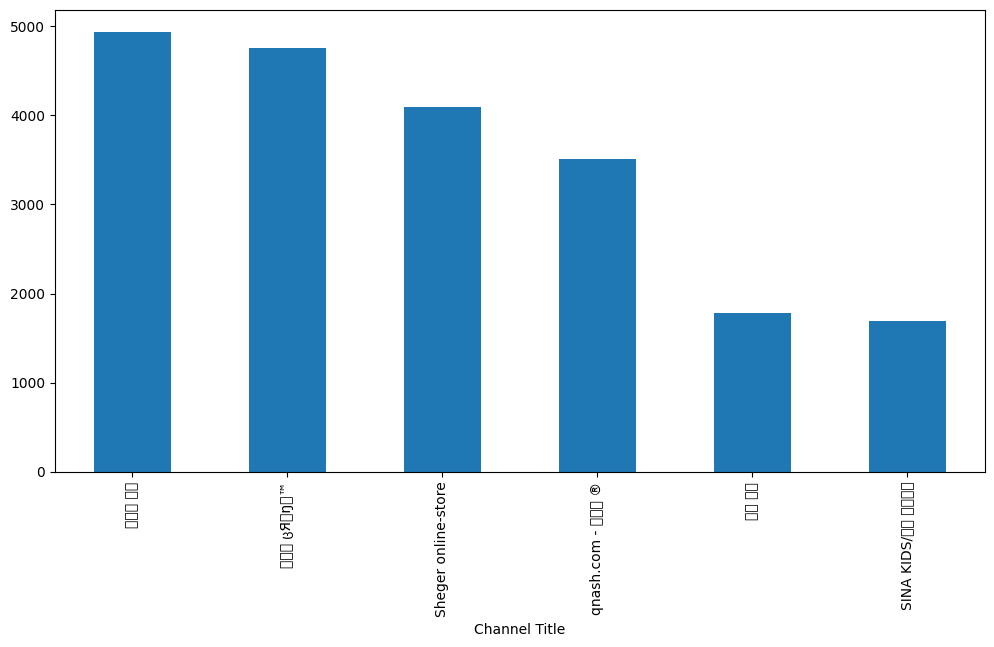

In [59]:
# Distribution of rows per channel
channel_counts = df["Channel Title"].value_counts()
#plotting the distribution
import matplotlib.pyplot as plt
channel_counts.plot(kind='bar', figsize=(12, 6))




In [60]:
# drop rows if if there is no amharic text
df = df[df["Message"].apply(lambda x: any('\u1200' <= char <= '\u137F' for char in x))]

In [61]:
df.shape

(19190, 6)

In [72]:
import pandas as pd
import ast

# Load cleaned data
df = pd.read_csv('../data/telegram_data_cleaned.csv')

def to_list(x):
    if isinstance(x, str) and x.startswith("[") and x.endswith("]"):
        try:
            return ast.literal_eval(x)
        except:
            return [x]
    elif isinstance(x, list):
        return x
    else:
        return [x]

# Replace with your desired channel name
channel_name = "ልዩ እቃ"

# Filter by channel
filtered = df[df["Channel Title"] == channel_name]

# Get the Message column, convert to list if needed
messages = filtered["Message"].apply(to_list)

with open("messages_by_channel_words.txt", "w", encoding="utf-8") as f:
    for msg in messages:
        for word in msg:
            f.write(str(word) + "\n")
        f.write("\n")